In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, StrMethodFormatter
from matplotlib.lines import Line2D

from fermi_script import GDT_interactions

%matplotlib widget

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig_width_pt = 244.0  # Get this from LaTeX using \the\columnwidth
text_width_pt = 508.0 # Get this from LaTeX using \the\textwidth

# plt.rc('font', size=21)
# plt.rc('xtick', labelsize=21)
# plt.rc('ytick', labelsize=21)

inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt*1.5 # width in inches
fig_width_full = text_width_pt*inches_per_pt  # 17
fig_height =fig_width*golden_mean # height in inches
fig_size = [fig_width,fig_height] #(9,5.5) #(9, 4.5)

In [3]:
folder = '/Users/zgl12/Research/Sn2019vxm/Fermi/'
url = "https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2019/bn191117006/current/"

ra = 299.6189
dec = 62.1377

# ra = 330
# dec = 80

# ra = 100
# dec = 10

In [4]:
fermi_6 = GDT_interactions(folder, download_files = False, url = url, detector = [6, 7],
                           find_spatial_probability = False, ra = ra, dec = dec, 
                           bin_by_time = 1, time_ref = 0, bkgd_times = [(-100.0, -20.0), (40.0, 100.0)], 
                           poly_order_bkg = 1, time_interp = np.linspace(-100, 100, 101), erange = (8, 900),
                           src_time = (-2, 9.0), init_plot = False)

# fermi_6
lc = fermi_6.tte_phaii_analysis()
lc_bins_6, lc_flux_6, lc_uncert_6 = lc

# lc_bins_6, lc_flux_6, lc_uncert_6, spectra_bins_6, spectra_flux_6, spectra_uncert_6 = fermi_6.tte_phaii_analysis(detector = 6)

In [5]:
x_nufnu = np.load('../../Data/x_nufnu.npy')
y_nufnu = np.load('../../Data/y_nufnu.npy')

In [6]:
# Comptonized -> Peak Energy: 11.27921437692867 keV : 1.4167047825017502
# PowerLaw -> Peak Energy: 7.251999855041505 keV : 1.4520895306940895
# Band -> Peak Energy: 22.68923618789576 keV : 1.406213137123738
# BrokenPowerLaw -> Peak Energy: 53.83073498869026 keV : 1.428933317720138
# DoubleBrokenPowerLaw -> Peak Energy: 668.4097150298386 keV : 2.470034580194959
# SmoothlyBrokenPowerLaw -> Peak Energy: 21.096043837475136 keV : 1.411693722540994
# 

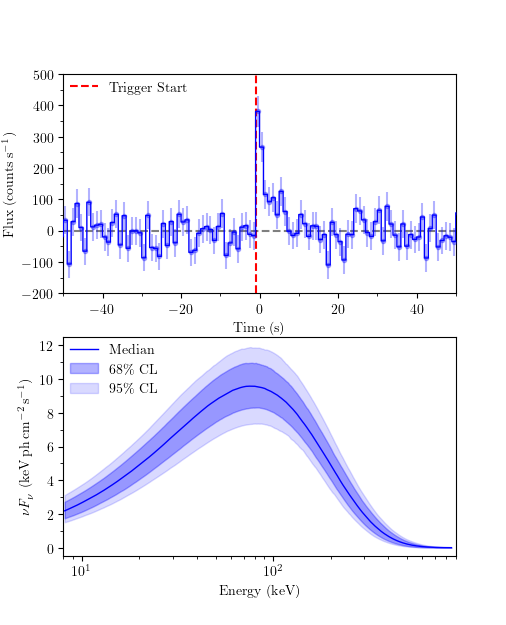

In [13]:
%matplotlib widget

fig, ax = plt.subplots(2, 1, figsize=[fig_width, fig_height*2])
# plt.subplots_adjust(wspace = 0.3)

ax[0].step(lc_bins_6, lc_flux_6, where='mid', color='blue', linewidth=1, zorder = 30)
ax[0].errorbar(lc_bins_6, lc_flux_6, yerr = lc_uncert_6, fmt = '.', color = 'blue', alpha = 0.3, zorder = 20)

# ax[0].step(lc_bins_6, lc_flux_7, where='mid', color='r', linewidth=1, zorder = 30)
# ax[0].errorbar(lc_bins_6, lc_flux_7, yerr = lc_uncert_7, fmt = '.', color = 'r', alpha = 0.3, zorder = 20)
ax[0].axvline(x=-1, color='r', linestyle='--', label = 'Trigger Start')
ax[0].axhline(0, color='k', linestyle='--', alpha = 0.5)

ax[1].plot(x_nufnu, np.nanmedian(y_nufnu, axis = 0), color='blue', linewidth=1, zorder = 30, label=r'Median')
ax[1].fill_between(x_nufnu, np.nanpercentile(y_nufnu, 84, axis = 0), np.nanpercentile(y_nufnu, 16, axis = 0), 
                   color='blue', linewidth=1, zorder = 20, alpha = 0.3, label=r'$68\%$ CL')
ax[1].fill_between(x_nufnu, np.nanpercentile(y_nufnu, 95, axis = 0), np.nanpercentile(y_nufnu, 5, axis = 0), 
                   color='blue', linewidth=1, zorder = 20, alpha = 0.15, label=r'$95\%$ CL')

# ax[1].axhline(0, color='k', linestyle='--', alpha = 0.5)

# ax[1].step(spectra_bins_6, spectra_flux_6, where='mid', color='blue', linewidth=1, zorder = 30)
# ax[1].errorbar(spectra_bins_6, spectra_flux_6, yerr = spectra_uncert_6, fmt = '.', color = 'blue', alpha = 0.3, zorder = 20)
# ax[1].axvline(x=150, color='m', linestyle='--', label = 'Xray Energy Threshold')


# ax[1].step(spectra_bins_7, spectra_flux_7, where='mid', color='r', linewidth=1, zorder = 30)
# ax[1].errorbar(spectra_bins_7, spectra_flux_7, yerr = spectra_uncert_7, fmt = '.', color = 'r', alpha = 0.3, zorder = 20)

ax[1].set_xscale('log')

ax[0].set_xlim(-50, 50)
ax[0].set_ylim(-200, 500)

ax[1].set_xlim(8, 900)
ax[1].set_ylim(-0.5, 12.5)

ax[0].yaxis.set_minor_locator(MultipleLocator(50))
ax[0].yaxis.set_major_locator(MultipleLocator(100))

ax[0].xaxis.set_minor_locator(MultipleLocator(10))
ax[0].xaxis.set_major_locator(MultipleLocator(20))

ax[1].yaxis.set_minor_locator(MultipleLocator(1))
ax[1].yaxis.set_major_locator(MultipleLocator(2))

ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel(r'Flux (${\rm counts}\;{\rm s^{-1}_{}}$)')

ax[1].set_xlabel('Energy (keV)')
ax[1].set_ylabel(r'$\nu F_{\nu}^{}$ (${\rm keV\,ph\,cm^{-2}_{}\,{\rm s}^{-1}_{}}$)')

ax[0].legend(loc='upper left', bbox_to_anchor = (-0.015, 1.025), frameon = False)
ax[1].legend(loc='upper left', bbox_to_anchor = (-0.015, 1.025), frameon = False, ncol = 1)

plt.savefig('../../Plots/fermi_lc_spectra.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [14]:
x_nufnu[np.nanargmax(np.nanmedian(y_nufnu, axis = 0))]

76.81449480591802

In [ ]:
spectra_bins_6, spectra_flux_6

In [ ]:
total_energy = np.trapz(spectra_flux_6, spectra_bins_6)

total_energy



In [ ]:
# # Step 2: Initialize variables for tracking the cumulative energy
# cumulative_energy = 0
# target_energy = 0.95 * total_energy  # 95% of the total energy

# # Step 3: Loop through the bins and accumulate energy until we reach 95%
# for i in range(1, len(spectra_bins_6)):
#     # Integration for the current segment (using the trapezoidal rule)
#     cumulative_energy += (spectra_flux_6[i] + spectra_flux_6[i-1]) * (spectra_bins_6[i] - spectra_bins_6[i-1]) / 2
    
#     # Check if we've captured 95% of the total energy
#     if cumulative_energy >= target_energy:
#         print(cumulative_energy/total_energy)
#         upper_limit = spectra_bins_6[i]
#         break

# print(f"The upper limit for 95% of the total energy is: {upper_limit}")

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

# Assuming spectra_bins_6 and spectra_flux_6 are already defined as numpy arrays

# Step 1: Create a finer grid for the spectra_bins_6
num_finer_bins = 1000  # You can adjust this number for your desired resolution
fine_bins = np.linspace(spectra_bins_6[0], spectra_bins_6[-1], num_finer_bins)

# Step 2: Interpolate the spectra_flux_6 onto the finer grid
interpolation_function = interp1d(spectra_bins_6, spectra_flux_6, kind='linear', fill_value="extrapolate")
fine_flux = interpolation_function(fine_bins)

# Step 3: Compute the total energy by integrating the interpolated flux
total_energy = np.trapz(fine_flux, fine_bins)

# Step 4: Initialize variables for tracking the cumulative energy
cumulative_energy = 0
target_energy = 0.95 * total_energy  # 95% of the total energy

# Step 5: Loop through the finer bins and accumulate energy until we reach 95%
for i in range(1, len(fine_bins)):
    # Integration for the current segment (using the trapezoidal rule)
    cumulative_energy += (fine_flux[i] + fine_flux[i-1]) * (fine_bins[i] - fine_bins[i-1]) / 2
    
    # Check if we've captured 95% of the total energy
    if cumulative_energy >= target_energy:
        upper_limit = fine_bins[i]
        break

print(f"The upper limit for 95% of the total energy (with interpolation) is: {upper_limit}")


In [ ]:
(1- 0.9998471584592336)*100

In [ ]:
0.998974760385547

In [ ]:
np.cos(np.radians(18.2))

In [ ]:
sne_ra = 299.618917 
sne_dec = 62.137731
ra = 297.9
dec = 76.4
uncertainty = 9.1

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Define the two sky positions
coord1 = SkyCoord(ra=sne_ra*u.degree, dec=sne_dec*u.degree, frame='icrs')
coord2 = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')

# Compute angular separation
separation = coord1.separation(coord2)

# Print result
print(f"Angular distance: {separation.deg:.6f} degrees")

In [ ]:
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

import numpy as np

def spherical_association_test(ra1, dec1, ra2, dec2, sigma_deg):
    """
    Test the association between two sky points under:
    - H1: von Mises–Fisher model
    - H0: uniform sky

    Returns:
        theta_deg        : Angular separation in degrees
        prob_assoc       : Cumulative probability under vMF (association model)
        prob_null        : Cumulative probability under uniform sky (null model)
        likelihood_ratio : Ratio P_assoc / P_null
    """
    def spherical_to_cartesian(ra, dec):
        ra_rad = np.radians(ra)
        dec_rad = np.radians(dec)
        x = np.cos(dec_rad) * np.cos(ra_rad)
        y = np.cos(dec_rad) * np.sin(ra_rad)
        z = np.sin(dec_rad)
        return np.array([x, y, z])
    
    mu = spherical_to_cartesian(ra1, dec1)
    x = spherical_to_cartesian(ra2, dec2)
    
    cos_theta = np.dot(mu, x)
    cos_theta = np.clip(cos_theta, -1, 1)  # safety
    theta_rad = np.arccos(cos_theta)
    theta_deg = np.degrees(theta_rad)
    
    # Association model: vMF
    sigma_rad = np.radians(sigma_deg)
    kappa = 1 / (sigma_rad ** 2)
    num = np.exp(kappa) - np.exp(kappa * cos_theta)
    denom = np.exp(kappa) - np.exp(-kappa)
    prob_assoc = num / denom

    # Null hypothesis: uniform sky
    prob_null = (1 - cos_theta) / 2  # area fraction of spherical cap

    likelihood_ratio = prob_assoc / prob_null if prob_null > 0 else np.inf

    return theta_deg, prob_assoc, prob_null, likelihood_ratio


spherical_association_test(sne_ra, sne_dec, ra, dec, uncertainty)

In [ ]:
(1 - 0.9995971649895653)*100